# Ensembl Finder

Find an ensembl-gene website on proteinatlas and get a page screenshot.

## Package Installation

Run following garbage in terminal:

```
# install a pupeteer python port
conda install -c conda-forge pyppeteer

# download headless chrome
pyppeteer-install
```

## Why not %%HTML?

Non-trash websites are not working due to security policy.

Refused to display 'https://www.proteinatlas.org/' in a frame
because an ancestor violates the following Content Security Policy
directive: "frame-ancestors 'self'"

In [81]:
import asyncio
import requests
import re
from pyppeteer import launch
from IPython.display import Image, display

In [130]:
async def show_gene_impl(ensembl):
    host = 'https://www.proteinatlas.org'
    response = requests.get('{}/search/{}'.format(host, ensembl))
    m = re.search('href="(\/{}-[^/]+\/tissue)"'.format(ensembl), str(response.content))

    if m == None:
        print('Gene page for ensembl={} not found.'.format(ensembl))

    # https://github.com/GoogleChrome/puppeteer/blob/master/docs/api.md
    browser = await launch()

    try:
        page = await browser.newPage()
        await page.goto(host + m[1])
        await page.evaluate('''{
            const selectors = '#cookie_statement,#sidemenu,.page_footer,.page_header,.atlas_nav .tabrow';
            Array.from(document.querySelectorAll(selectors)).forEach(function(node) {
                node.remove()
            });
            document.querySelector('.main_table').style.top = '20px';
            document.querySelector('.atlas_header').style.top = '0px';
            document.querySelector('.atlas_border').style.top = '0px';
            document.querySelector('.atlas_border').style.width = '100%';
            document.querySelector('td > div.tissue_summary').style.margin = '0';
        }''')
        clip = { 'width': 950, 'x': 200, 'y': 200 }
        await page.screenshot(path='Output/image_{}.png'.format(ensembl), fullPage=True, clip=clip)
    except Exception as e:
        print('Failed to load the page, ' + str(e))
    finally:
        await browser.close()

    display(Image(filename='Output/image_{}.png'.format(ensembl)))
    
def show_gene(ensembl):
    print('Loading {} page...'.format(ensembl))
    asyncio.run_coroutine_threadsafe(show_gene_impl(ensembl), asyncio.get_event_loop())

Loading ENSG00000146083 page...


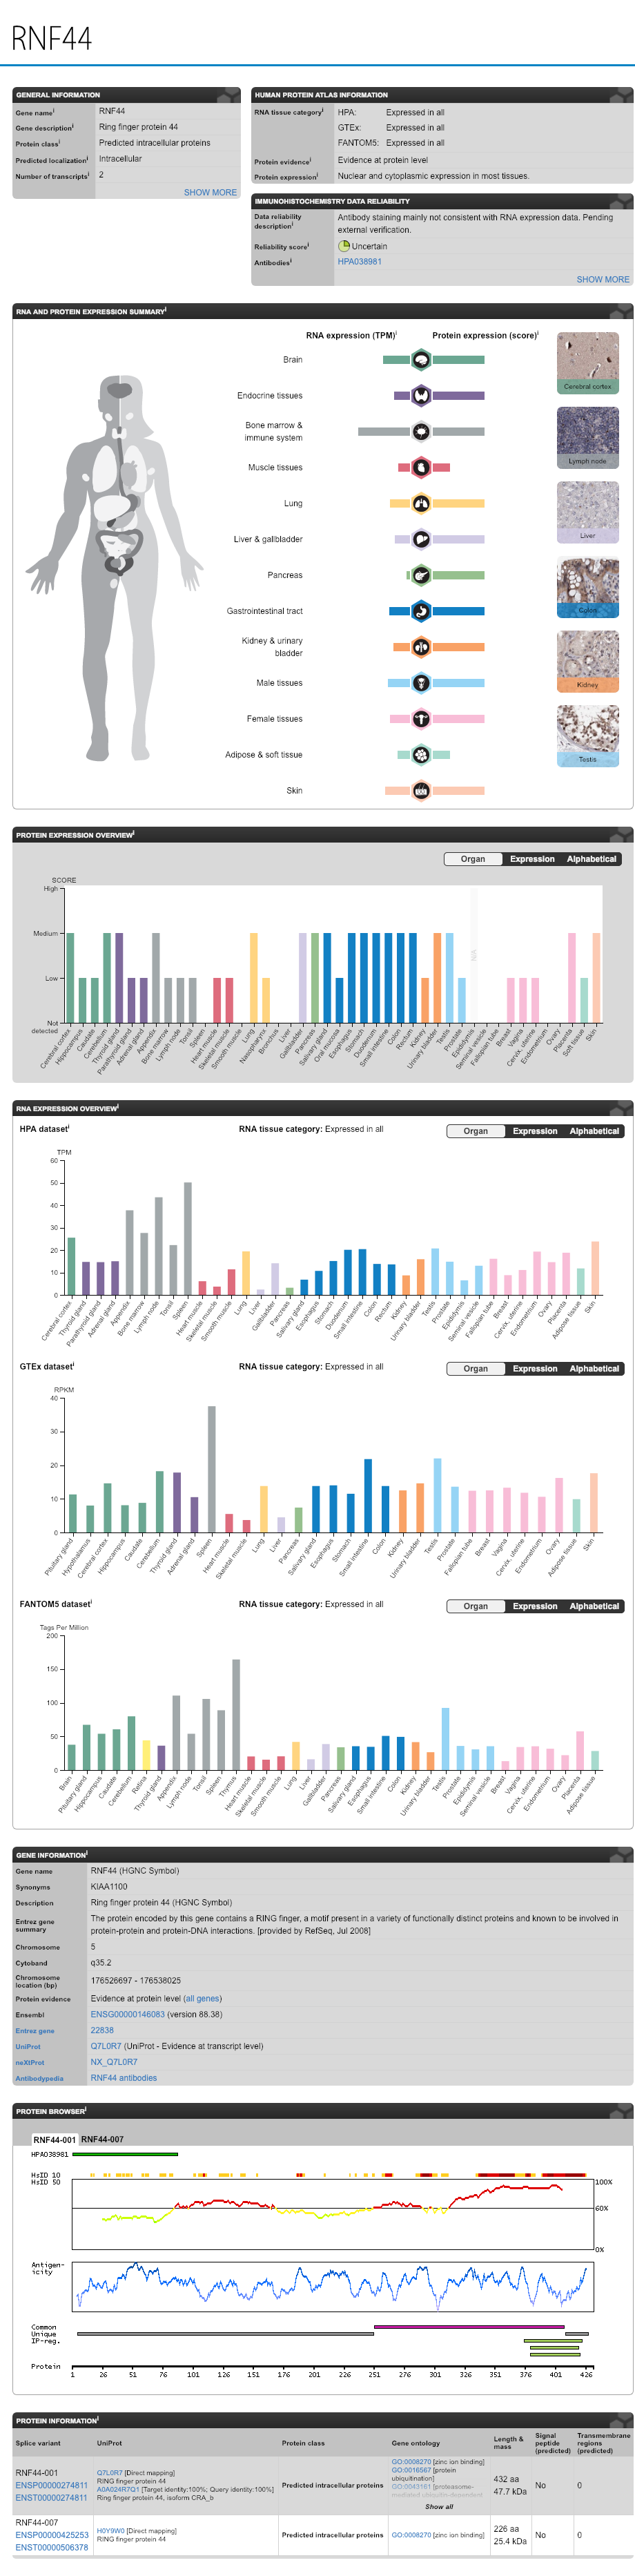

In [132]:
# show_gene('ENSG00000186115')
show_gene('ENSG00000146083')
# show_gene('ENSG00000107863')